In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt  
import seaborn as sns

import seaborn as sns 

### Задание 0 

<div class="alert alert-info">

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

In [2]:
n = pow(((15 * 1.96) / 3), 2)
n

96.03999999999998

In [3]:
n = 96

In [4]:
if n%1!=0: print('Вы забыли округлить ответ!!!!')
elif hash(str(n)) == -6483854632660926687: print("Ошибка, вероятно выбран квартиль для уровня доверия 0.95, а не 0.975. Смотри формулу!")
elif hash(str(n)) != 8942973788178395504: print("Нет, Неверно!")
else: print('Верно!!!! Двигайтесь дальше!')        

Нет, Неверно!


### Задание 1

<div class="alert alert-info">

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [5]:
import math

kvantil = 1 - (1 - 0.98) / 2 
kvantil

0.99

In [6]:
Z_a = 2.326
acc = 15 * Z_a / math.sqrt(25)
acc

6.978

In [7]:
left_int = 130 - acc
right_int = 130 + acc
L = round(right_int - left_int)
L

14

In [8]:
if L%1!=0: print('Вы забыли округлить ответ!!!!')
elif hash(str(L)) == 8859716730303628099: print("Ошибка, вероятно выбран квартиль для уровня доверия 0.98, а не 0.99. Смотри формулу!")
elif hash(str(L)) != 6091462292841498317: print("Нет, Неверно!")
else: print('Верно!!!! Двигайтесь дальше!')

Нет, Неверно!


### Задание 2 

<div class="alert alert-info">

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [9]:
import scipy.stats as stats
import matplotlib.pyplot as plt

population_men  = stats.norm.rvs(loc=19, scale=171, size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=16, scale=165, size=12000)  # Выборка женщин со средним ростом 165
t_test = stats.ttest_1samp(a=population_women, popmean=population_men.mean())
t_test

Ttest_1sampResult(statistic=-3.4694091774045477, pvalue=0.0005234362154174848)

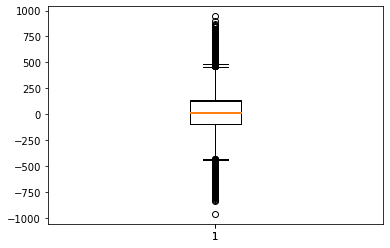

In [10]:
plt.boxplot(population_men);
plt.boxplot(population_women);
plt.show()

Выборки совпадают, особых различий нет

### Задание 3 

<div class="alert alert-info">

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [11]:
kvantil = 1 - (1 - 0.95) / 2 
kvantil

0.975

In [12]:
n = pow(((150 * 2.241) / 50), 2)
print('Объем необходимой выборки равен:', round(n))

Объем необходимой выборки равен: 45


### Задание 4

<div class="alert alert-info">

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [13]:
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,10,15
Солнце,39,34


Нулевая гипотеза Н0: "волшебник" не умеет предсказывать погоду, события случайны

Альтернативная гипотеза Н1: "волшебник" умеет предсказывать погоду, события не случайны

In [14]:
import scipy.stats as stats

alpha = 0.05
oddsratio, pvalue = stats.fisher_exact(observations)
if pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Принимаем нулевую гипотезу')

Принимаем нулевую гипотезу


### Задание 5

<div class="alert alert-info">

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [15]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

In [16]:
def mean_confidence_interval(data, confidence=0.95):   
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h 

In [17]:
conf_interval = mean_confidence_interval(data, confidence=0.9)
conf_interval

(6.074074746111319, 6.628571428571429, 7.183068111031539)

### Задание 6

<div class="alert alert-info">

Принадлежат ли выборки data_1 и data_2 одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [18]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

In [19]:
t_test = stats.ttest_ind(data_1, data_2)
print(f'{t_test.pvalue:.12f}')

0.000000000021


<AxesSubplot:>

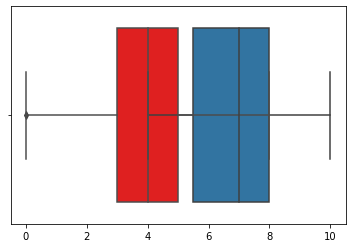

In [20]:
sns.boxplot(x=data_1)
sns.boxplot(x=data_2, color='red')

выборки различны

### Задание 7

<div class="alert alert-info">

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

In [21]:
url  = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/AB_NYC_2019.csv'
df = pd.read_csv(url, error_bad_lines=False)
df.dropna(how='any',inplace=True)
df.head(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<AxesSubplot:>

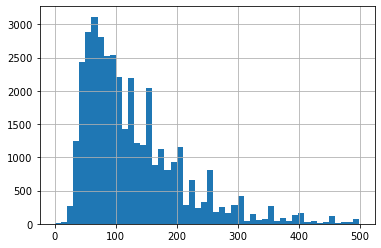

In [22]:
df[df.price<500].price.hist(bins=50)

<AxesSubplot:>

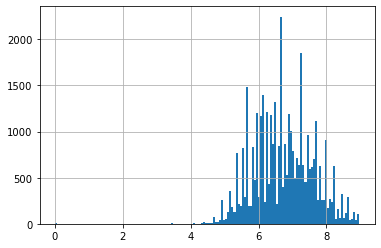

In [23]:
np.log2(abs(df[df.price<500].price)+1).hist(bins=150)

In [24]:
print(df[df.price<400].price.mean())
data = df[(df.neighbourhood_group == 'Brooklyn') | (df.neighbourhood_group=='Staten Island') | (df.neighbourhood_group=='Queens')].price
mean_confidence_interval(data, confidence=0.999)

122.56345677697612


(111.68856960410567, 115.49388042203987, 119.29919123997406)

Так как значение p-value меньше 5%, считаем что нулевая гипотеза не действительна (отвергаем), и принимаем альтернативную гипотезу. Но правильнее было бы привести данные к приближенному нормальному распределению (например путём взятия логарифма), пересчитать значение p-value, и на основании полученного значения сделать выводы. 

### Задание 8 

<div class="alert alert-info">
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [25]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-7.5,size=300)
difference = np.concatenate((A, B))
difference.mean()

6.195653565192412

In [26]:
stats.ttest_ind(a=A, b=B)

Ttest_indResult(statistic=1.8847229265385363, pvalue=0.05995194857529052)

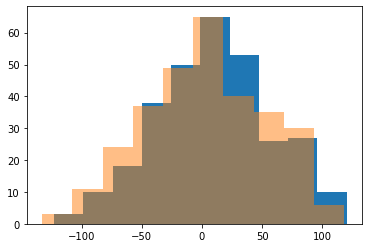

In [27]:
plt.hist(A);
plt.hist(B, alpha=0.5);
plt.show()

* Различия эффективности препаратов не значительны. 
* При значении p-value менее 5 процентов (чем меньше тем значимее).